In [1]:
def augment_owns(graph, user, lang=False):
    graph.add_node(user.login, node_type = 'user')
    repos = user.get_repos()
    for repo in repos:
        graph.add_node(repo.name, node_type = 'repo')
        graph.add_edge(user.login, repo.name, edge_type = 'owns')
        if lang:
            graph.add_node(repo.language, node_type='lang')
            graph.add_edge(user.login, repo.language, edge_type='users')
            graph.add_edge(repo.name, repo.language, edge_type='speaks')
    return repos

def augment_stargazers(graph, repo):
    gazers = repo.get_stargazers()
    for stargazer in gazers:
        graph.add_node(stargazer.login, node_type = 'user')
        graph.add_edge(stargazer.login, repo.name, edge_type = 'gazes')
    return gazers

In [7]:
from github import Github
from github_token import TOKEN
client = Github(TOKEN)

REPO = 'Airblader/i3'
repo = client.get_repo(REPO)

USER = 'StephenBurke'
user = client.get_user(USER)

In [8]:
#from gh_graph_utils import augment_owns, augment_stargazers
import networkx as nx

graph = nx.DiGraph()
graph.add_node(repo.name, node_type='repo')


In [9]:
# RESET
visited_users = set()
visited_users.add(user)
ghgraph = nx.DiGraph()
startuser = client.get_user(USER)

In [10]:
visited_users = set()
newusers = augment_stargazers(graph, repo)
newrepos = augment_owns(ghgraph, startuser, lang = True)

In [11]:
#alternate running this with the next cell
newrepos = []
nx.write_gpickle(graph, '3-step.pkl')
for user in newusers:
    if not user in visited_users:
        newrepos.extend(augment_owns(graph, user))
        visited_users.add(user)

RateLimitExceededException: 403 {"message": "API rate limit exceeded for user ID 42814417.", "documentation_url": "https://docs.github.com/rest/overview/resources-in-the-rest-api#rate-limiting"}

In [12]:
newusers = []
nx.write_gpickle(graph, '2-step.pkl')
for repo in newrepos:
    newusers.extend(augment_stargazers(graph, repo))

GithubException: 451 {"message": "Repository access blocked", "block": {"reason": "dmca", "created_at": "2018-02-10T05:12:12Z", "html_url": "https://github.com/github/dmca/blob/master/2018/2018-02-09-Apple-2.md"}}

In [ ]:
# final write, for prosperity
nx.write_gpickle(graph, 'repo-start.pkl')


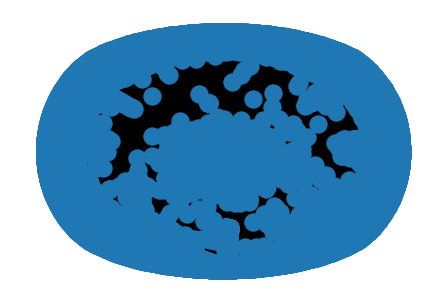

In [16]:
nx.draw_spring(graph, with_labels = False)